## 1. Dataset and libraries

We begin by setting up our working environment by importing the necessary Python libraries that we will use throughout the notebook.

Then we load and inspect the dataset to get familiar with its structure and contents.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

In [2]:
our_file_path= r"C:\Users\abdal\Downloads\all_tables.csv"

data=pd.read_csv(our_file_path)

In [3]:
data.head()

,Place,Team,GP,W,D,L,GF,GA,GD,P,Year,League
0,1,ARS,38,26,9,3,79,36,43,87,2001,English Premier League
1,2,LIV,38,24,8,6,67,30,37,80,2001,English Premier League
2,3,MAN,38,24,5,9,87,45,42,77,2001,English Premier League
3,4,NEW,38,21,8,9,74,52,22,71,2001,English Premier League
4,5,LEE,38,18,12,8,53,37,16,66,2001,English Premier League






## 2. Data exploration
Here we will perform a preliminary exploration of our dataset to get a better understanding of the data we are working with.

This initial exploration of our data will help uncover underlying patterns and relationships that can inform our choice of models.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Place   2484 non-null   int64 
 1   Team    2484 non-null   object
 2   GP      2484 non-null   int64 
 3   W       2484 non-null   int64 
 4   D       2484 non-null   int64 
 5   L       2484 non-null   int64 
 6   GF      2484 non-null   int64 
 7   GA      2484 non-null   int64 
 8   GD      2484 non-null   int64 
 9   P       2484 non-null   int64 
 10  Year    2484 non-null   int64 
 11  League  2484 non-null   object
dtypes: int64(10), object(2)
memory usage: 233.0+ KB


In [5]:
data.describe()

,Place,GP,W,D,L,GF,GA,GD,P,Year
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,10.152174,36.173913,13.471820,9.229871,13.471820,48.218599,48.219404,-0.000805,49.570853,2010.774557
std,5.593437,2.805184,5.581131,3.001392,5.197626,17.591236,14.991223,24.072049,16.050446,6.206857
min,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-69.000000,9.000000,2000.000000
25%,5.000000,34.000000,10.000000,7.000000,10.000000,38.000000,40.000000,-16.000000,39.000000,2005.000000
50%,10.000000,38.000000,12.000000,9.000000,14.000000,46.000000,49.000000,-3.000000,46.000000,2011.000000
75%,15.000000,38.000000,17.000000,11.000000,17.000000,57.000000,57.000000,12.000000,59.000000,2016.000000
max,20.000000,38.000000,33.000000,20.000000,29.000000,121.000000,98.000000,89.000000,102.000000,2021.000000


Text(0, 0.5, 'Frequency')

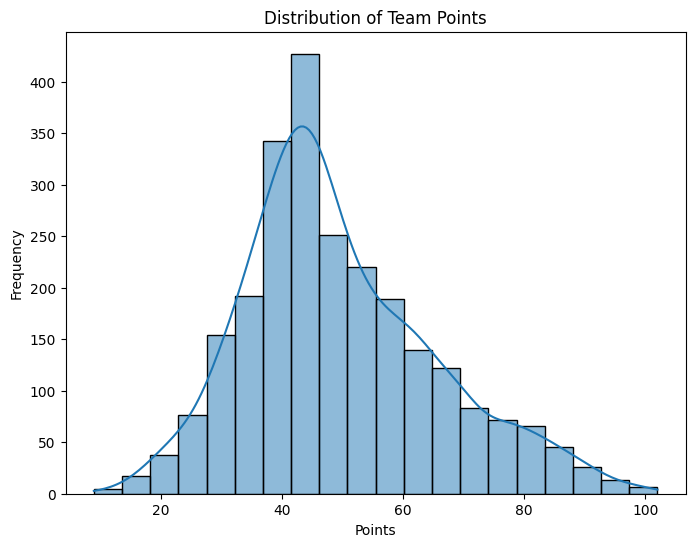

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['P'], bins=20, kde=True)
plt.title('Distribution of Team Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

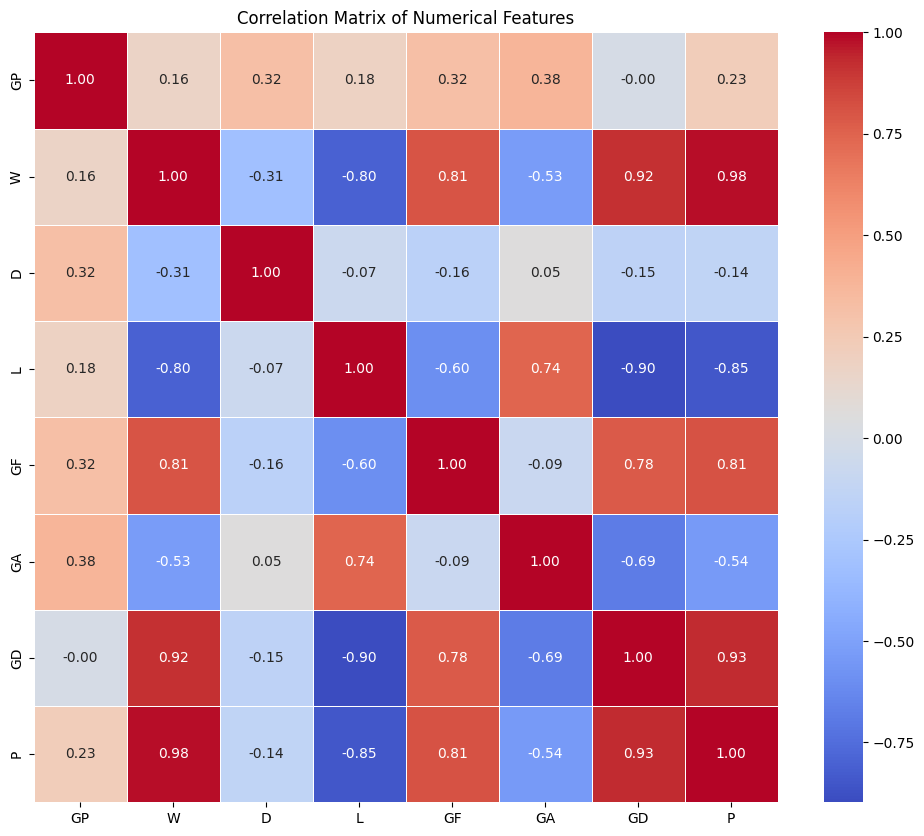

In [7]:
numerical_cols = ['GP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'P']

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


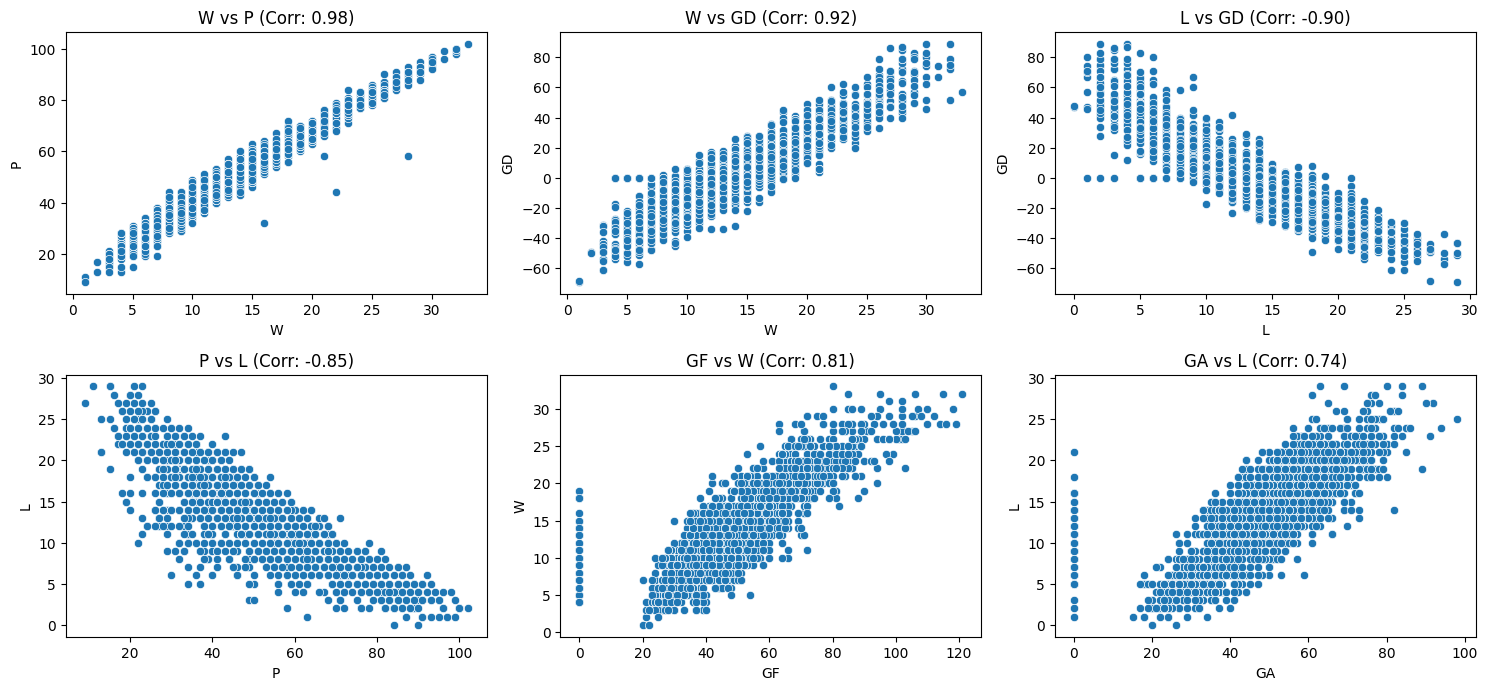

In [8]:
key_pairs = [
    ('W', 'P', 0.98),
    ('W', 'GD', 0.92),
    ('L', 'GD', -0.90),
    ('P', 'L', -0.85),
    ('GF', 'W', 0.81),
    ('GA', 'L', 0.74)
]

plt.figure(figsize=(15, 10))
for i, (var1, var2, corr) in enumerate(key_pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x=var1, y=var2)
    plt.title(f'{var1} vs {var2} (Corr: {corr:.2f})')
plt.tight_layout()
plt.show()

In [9]:
data['League'].nunique()

data.groupby('League')['P'].mean()


League
Dutch Eredivisie          46.042929
English Premier League    52.183333
French Ligue 1            50.885000
German Bundesliga         46.383838
Italian Serie A           49.981481
Spanish La Liga           51.522727
Name: P, dtype: float64




## 3. Data preprocessing
We prepare the data for modelling by splitting it into training and testing sets and scaling the features to help our models perform optimally.

In [10]:
import category_encoders as ce
categorical_cols = ['Team', 'League']

X = data.drop('P', axis=1)
y = data['P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
encoder = ce.TargetEncoder(cols=categorical_cols)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

## 4. Model training and evaluation

In [12]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [15]:
# Cell 12: Train the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Generate predictions for test set
y_pred_test = model.predict(X_test_encoded)

# Calculate test metrics
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test R² Score: {r2_test:.3f}")

# Generate predictions for training set
y_pred_train = model.predict(X_train_encoded)

# Calculate training metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"\nTraining MSE: {mse_train:.2f}")
print(f"Training R² Score: {r2_train:.3f}")

# Assess overfitting
print("\nOverfitting Check:")
if mse_train < mse_test * 0.8 and r2_train > r2_test + 0.05:
    print("Warning: Model may be overfitting. Training performance is significantly better than test performance.")
else:
    print("Model does not show signs of overfitting. Training and test performance are comparable.")


Test MSE: 0.44
Test R² Score: 0.998

Training MSE: 1.56
Training R² Score: 0.994

Overfitting Check:
Model does not show signs of overfitting. Training and test performance are comparable.


In [ ]:
new_team_data = pd.DataFrame({
    'Place': [2],
    'Team': ['LIV'],
    'GP': [35],
    'W': [25],
    'D': [7],
    'L': [4],
    'GF': [81],
    'GA': [35],
    'GD': [46],
    'Year': [2025],
    'League': ['English Premier League']

})


In [ ]:
new_team_encoded = encoder.transform(new_team_data)
predicted_points = model.predict(new_team_encoded)

print(f"Predicted Points for Liverpool CF 2023 : {predicted_points[0]:.2f}")

Predicted Points for Liverpool CF 2023 : 80.77
